In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats
from pingouin import kruskal
import warnings
warnings.filterwarnings(action='ignore') 

In [7]:
df = pd.read_excel('NIPA_EMR.xlsx',  header = 2 ) # 데이터 불러오기

df = df[2:] # 데이터 확인
print(df.shape)

(100, 179)


## 결측치 확인

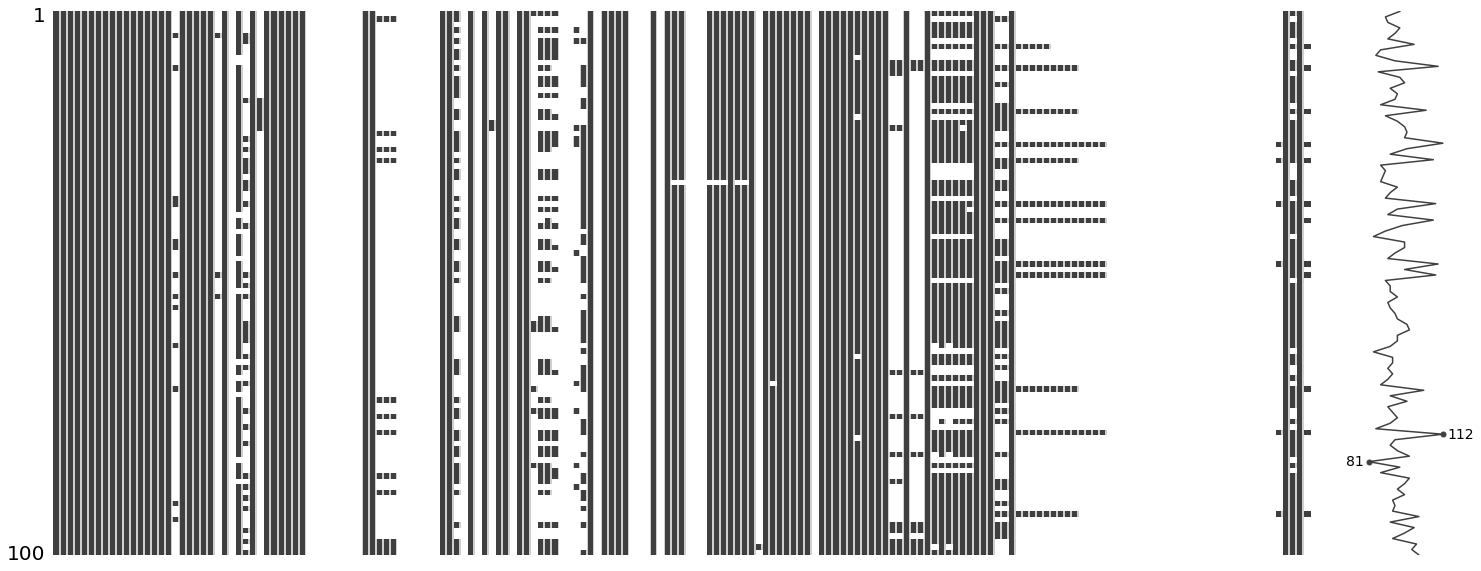

In [8]:
msno.matrix(df)

## EDA

### 1. 수술 당시 연령군 별 생존기간

In [9]:
temp = df[['Age','OS']]
temp['Age_group']=pd.cut(temp['Age'], bins=[0,20,65,100], labels=['young','youth','old'])
temp['Age_group'].value_counts()
temp = temp.drop(['Age'], axis=1) 
temp['OS'] = temp['OS'].astype(int)
temp

,OS,Age_group
2,165,youth
3,74,old
4,178,youth
5,177,youth
6,177,youth
...,...,...
97,154,old
98,61,youth
99,174,youth
100,174,youth


youth    68
old      32
young     0
Name: Age_group, dtype: int64


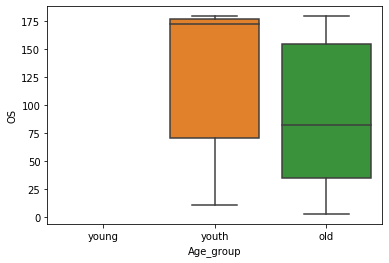

In [10]:
print(temp['Age_group'].value_counts())
sns.boxplot(x='Age_group', y='OS', data=temp)

In [11]:
temp_youth = temp[temp['Age_group']=='youth']
temp_old = temp[temp['Age_group']=='old']

print(stats.shapiro(temp_youth['OS']))
print(stats.shapiro(temp_old['OS']))

(0.6823933124542236, 7.601640844567825e-11)
(0.899077832698822, 0.005867797881364822)


In [12]:
stats.mannwhitneyu(temp_youth['OS'], temp_old['OS'])

MannwhitneyuResult(statistic=628.5, pvalue=0.0003431695506084983)

### 2. ASA

ASA 등급 : 미국 마취과학회에서 정한 신체 상체 분류 체계
1. 전신 질환이 없는 건강한 환자
2. 경한 정신 질환을 가진 환자
3. 중증의 전신 질환을 가진 환자
4. 생명의 위협을 초래할 수 있는 정도의 중증 전신 질환을 가진 환자
5. 수술 없이는 생명을 구할 수 없는 상태의 빈사 상태의 환자

In [13]:
temp = df[['ASA','OS']]
print(temp['ASA'].value_counts())
temp['OS'] = temp['OS'].astype(int)
kruskal(data=temp, dv='OS', between='ASA')

2    74
3    22
1     4
Name: ASA, dtype: int64


,Source,ddof1,H,p-unc
Kruskal,ASA,2,9.344589,0.009351


### 3. BMI
체질량 지수 : 
몸무게(kg) / 키(m)^2

인간의 대략적인 비만도를 나타내는 지수

대한비만학회의 진료지침(http://general.kosso.or.kr/html/?pmode=obesityDiagnosis) 상
- 저체중 : BMI < 18.5
- 정상 : 18.5 <= BMI < 23
- 비만 : 23 <= BMI 

로 범주화 하여 사용.

In [14]:
temp = df[['BMI','OS']]
temp['BMI'] = temp['BMI'].astype(float)
temp['BMI']=pd.cut(temp['BMI'], bins=[0,18.5,23,100], labels=['underweight','normal','overweight'])
print(temp['BMI'].value_counts())
temp['OS'] = temp['OS'].astype(int)
kruskal(data=temp, dv='OS', between='BMI')

overweight     60
normal         34
underweight     6
Name: BMI, dtype: int64


,Source,ddof1,H,p-unc
Kruskal,BMI,2,2.567527,0.276993


### 4. 수술시 확인한 종양의 위치

- 1 Colon
 - 11 Cecum
 - 12 Ascending colon
 - 13 Hepatic flexure
 - 14 Transverse colon
 - 141 pTC
 - 142 mTC
 - 143 dTC
 - 15 Splenic Flexure
 - 16 Descending colon
 - 17 Sigmoid colon
 - 18 Rectumsigmoid colon
-----

- 2 Rectum
 - 21 Upper rectum
 - 22 Mid rectum
 - 23 Lower rectum
 - 24 Rectum (10-15 cm)
 - 25 Rectum (5-10 cm)
 - 26 Rectum (0-5 cm)

In [15]:
#수술시 확인한 종양의 위치
Intraoperative_tumor_location = df[['Intraoperative_tumor_location', 'OS']]
Intraoperative_tumor_location['OS'] = Intraoperative_tumor_location['OS'].astype(int)
print(Intraoperative_tumor_location['Intraoperative_tumor_location'].value_counts())
kruskal(data=Intraoperative_tumor_location, dv='OS', between='Intraoperative_tumor_location')

23    39
17    17
12    10
16     9
11     8
21     7
22     5
14     3
13     1
15     1
Name: Intraoperative_tumor_location, dtype: int64


,Source,ddof1,H,p-unc
Kruskal,Intraoperative_tumor_location,9,12.715554,0.175905


### 5. 병리학적 종양 위치

병리학 : 세포, 조직, 장기의 표본을 육안, 현미경, X-ray 등지로 검사하여 그것들이 질병에 침범되었을 때에 어떤 변화가 나타나는지 연구하는 학문

In [16]:
#병리학적 종양 위치
Tumor_location_pathology =  df[['Tumor_location_pathology', 'OS']]
Tumor_location_pathology['OS'] = Intraoperative_tumor_location['OS'].astype(int)
print(Tumor_location_pathology['Tumor_location_pathology'].value_counts())
kruskal(data=Tumor_location_pathology, dv='OS', between='Tumor_location_pathology')

25    39
18    17
13    10
17     9
12     8
23     7
24     5
15     3
14     1
16     1
Name: Tumor_location_pathology, dtype: int64


,Source,ddof1,H,p-unc
Kruskal,Tumor_location_pathology,9,12.715554,0.175905


 ### 병리학적 T 병기
 
T병기
Primary Tumor
(종양의 크기)

- 1 TX, 
- 2 T0, 
- 3 Tis, 
- 4 T1, 
- 5 T2, 
- 6 T3, 
 - 61 T3a, 
 - 62 T3b, 
 - 63 T3c,
 - 64 T3d, 
- 7 T4, 
 - 71 T4a,
 - 72 T4b


In [17]:
#병리학적 T병기
pT =  df[['pT', 'OS']]
pT['OS'] = pT['OS'].astype(int)
kruskal(data=pT, dv='OS', between='pT')

,Source,ddof1,H,p-unc
Kruskal,pT,5,5.231612,0.388273


 ### 림프관, 혈관 침윤
 

- 1 lymphatic invasion, 
 - 11 present, 
 - 12 unidentified, 
- 2 vascular invasion, 
 - 21 present, 
 - 22 unidentified, 
- 3 lymphovascular invasion, 
 - 31 present, 
 - 32 unidentified, 
 - 4 not assessed


In [29]:
#림프관/혈관 침윤
LVI =  df[['LVI', 'OS']]
LVI = LVI.dropna()
LVI['OS'] = pT['OS'].astype(int)
kruskal(data=LVI, dv='OS', between='LVI')

,Source,ddof1,H,p-unc
Kruskal,LVI,3,11.730963,0.008364


In [30]:
from scipy.stats import mannwhitneyu
from statsmodels.sandbox.stats.multicomp import MultiComparison

comp = MultiComparison(LVI['OS'], LVI['LVI'])

result = comp.allpairtest(mannwhitneyu, method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
11,21,64.0,0.4041,1.0,False
11,31,74.5,0.3936,1.0,False
11,32,442.5,0.003,0.0179,True
21,31,20.5,0.5,1.0,False
21,32,106.0,0.0392,0.2354,False
31,32,117.5,0.0222,0.1333,False


### 병리학적 N 병기
N 병기 : 림프절 전이 정도
- 1 NX
- 2 N0
- 3 N1
 - 31 N1a
 - 32 N1b
 - 33 N1c
- 4 N2
 - 41 N2a
 - 42 N2b

In [33]:
#병리학적 N 병기
pN =  df[['pN', 'OS']]
pN['OS'] = pN['OS'].astype(int)
kruskal(data=pN, dv='OS', between='pN')

,Source,ddof1,H,p-unc
Kruskal,pN,5,22.135409,0.000493


In [36]:
from scipy.stats import mannwhitneyu
from statsmodels.sandbox.stats.multicomp import MultiComparison

comp = MultiComparison(pN['OS'], pN['pN'])

result = comp.allpairtest(mannwhitneyu, method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
2,3,7.0,0.0043,0.0649,False
2,31,284.5,0.092,1.0,False
2,32,177.5,0.0014,0.0215,True
2,41,147.0,0.0134,0.2012,False
2,42,43.0,0.0018,0.0277,True
3,31,12.5,0.1565,1.0,False
3,32,20.0,0.4749,1.0,False
3,41,10.5,0.2492,1.0,False
3,42,6.0,0.2584,1.0,False
31,32,71.0,0.1115,1.0,False


# 병리학적 M병기

M 병기 : Distant Metastasis: 원격  전이의 여부 (다른 장기에 원격으로 전이되었는가?)

- 1 M0
- 2 M1
 - 21 M1a
 - 22 M1b
  - 23 M1c

In [28]:
#병리학적 M병기

pM =  df[['pM', 'OS']]
pM['OS'] = pM['OS'].astype(int)
print(pM['pM'].value_counts())
kruskal(data=pM, dv='OS', between='pM')

1     90
21    10
Name: pM, dtype: int64


,Source,ddof1,H,p-unc
Kruskal,pM,1,13.124605,0.000291


In [41]:
#pM['OS'][pM['pM']==21]

In [22]:
from scipy.stats import mannwhitneyu
from statsmodels.sandbox.stats.multicomp import MultiComparison

comp = MultiComparison(pM['OS'], pM['pM'])

result = comp.allpairtest(mannwhitneyu, method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
1,21,135.0,0.0001,0.0001,True


### 조직학적 병기

- 0 - 0
- 1 - I
- 2 - II
 - 21 - IIA
 - 22 - IIB
 - 23 - IIC
- 3 - III
 - 31 - IIIA
 - 32 - IIIB
 - 33 - IIIC
- 4 - IV
 - 41 - IVA
 - 42 - IVB
 - 43 - IVC

In [23]:
#조직학적 병기
pTNM =  df[['pTNM', 'OS']]
pTNM['OS'] = pTNM['OS'].astype(int)
kruskal(data=pTNM, dv='OS', between='pTNM')

,Source,ddof1,H,p-unc
Kruskal,pTNM,7,24.685274,0.000863


In [42]:
from scipy.stats import mannwhitneyu
from statsmodels.sandbox.stats.multicomp import MultiComparison

comp = MultiComparison(pTNM['OS'], pTNM['pTNM'])

result = comp.allpairtest(mannwhitneyu, method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
0,1,5.0,0.0693,1.0,False
0,4,3.0,0.0813,1.0,False
0,21,14.5,0.1297,1.0,False
0,22,1.0,0.1871,1.0,False
0,31,2.0,0.3493,1.0,False
0,32,24.5,0.5,1.0,False
0,33,12.0,0.4661,1.0,False
1,4,12.5,0.0002,0.0056,True
1,21,224.0,0.4293,1.0,False
1,22,17.5,0.2488,1.0,False


### 수술  후 항암요법의 종류
- 1 5-FU/LV
- 2 XELODA
- 3 FOLFOX 
- 4 XELOX
- 5 FOLFIRI
- 6 ERBITUX 
7 Avastin
8 others

In [24]:
#수술 후 항암요법의 종류
Postop_Chemo_Regimen =  df[['Postop_Chemo_Regimen', 'OS']]
Postop_Chemo_Regimen = Postop_Chemo_Regimen.dropna()
Postop_Chemo_Regimen['OS'] = Postop_Chemo_Regimen['OS'].astype(int)
kruskal(data=Postop_Chemo_Regimen, dv='OS', between='Postop_Chemo_Regimen')

,Source,ddof1,H,p-unc
Kruskal,Postop_Chemo_Regimen,3,8.928136,0.030262


In [25]:
from scipy.stats import mannwhitneyu
from statsmodels.sandbox.stats.multicomp import MultiComparison

comp = MultiComparison(Postop_Chemo_Regimen['OS'], Postop_Chemo_Regimen['Postop_Chemo_Regimen'])

result = comp.allpairtest(mannwhitneyu, method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
1,2,0.0,0.0464,0.2781,False
1,3,168.0,0.0224,0.1342,False
1,8,43.5,0.0572,0.3434,False
2,3,0.0,0.0819,0.4912,False
2,8,0.0,0.1855,1.0,False
3,8,12.0,0.4267,1.0,False
